# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

import seaborn as sns

#The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns.
#The score ranges from 0 (no predictive power) to 1 (perfect predictive power).
#It can be used as an alternative to the correlation (matrix).

!pip install ppscore
import ppscore as pps

# Data Dictionary

- survival        0 = No, 1 = Yes
- pclass	      Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    - pclass: A proxy for socio-economic status (SES)
       - 1st = Upper
       - 2nd = Middle
       - 3rd = Lower
- sex	          Sex	
- Age	          Age in years	
- sibsp	          # of siblings / spouses aboard the Titanic
    -sibsp: The dataset defines family relations in this way...
        - Sibling = brother, sister, stepbrother, stepsister
        - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch	          # of parents / children aboard the Titanic	
    - parch: The dataset defines family relations in this way...
        - Parent = mother, father
        - Child = daughter, son, stepdaughter, stepson
        - Some children travelled only with a nanny, therefore parch=0 for them.
        
- ticket	      Ticket number	
- fare	          Passenger fare	
- cabin	          Cabin number	
- embarked	      Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Import DataFiles

In [2]:
#kaggle_train = pd.read_csv('../DataSets/Kaggle/train.csv')
#kaggle_test = pd.read_csv('../DataSets/Kaggle/test.csv')
titanic_complete = pd.read_csv('../DataSets/TensorFlow/Titanic.csv')
titanic_df = titanic_complete.copy()

In [3]:
titanic_complete.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


# Data Preprocessing

In [4]:
titanic_complete.shape

(1309, 14)

In [5]:
titanic_complete.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

In [6]:
# Dropping unwanted columns
titanic_complete=titanic_complete.drop(['name','cabin','body','boat','home.dest','ticket'],1)
titanic_complete

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2,1,2,151.55,S
3,1,0,male,30,1,2,151.55,S
4,1,0,female,25,1,2,151.55,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,14.4542,C
1305,3,0,female,?,1,0,14.4542,C
1306,3,0,male,26.5,0,0,7.225,C
1307,3,0,male,27,0,0,7.225,C


In [7]:
missing_data = titanic_complete.isnull().sum().sort_values(ascending = False)
missing_data
# Missing Values are populated with "?"

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### Finding Missing Values('?') and Fixing them

In [8]:
titanic_complete = titanic_complete.replace('?',np.nan)


In [9]:
#Converting age and fare into float
titanic_complete['age'] = titanic_complete['age'].astype(float)
titanic_complete['fare'] = titanic_complete['fare'].astype(float)
titanic_complete.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [10]:
#View Missing Values
missing_data = titanic_complete.isnull().sum().sort_values(ascending = False)
missing_data

age         263
embarked      2
fare          1
pclass        0
survived      0
sex           0
sibsp         0
parch         0
dtype: int64

#### AGE

In [11]:
# Fill the missing values with the average of all Ages - MEAN
import math

mean = titanic_complete['age'].dropna().mean()
print(mean)
titanic_complete['age'] = titanic_complete['age'].fillna(math.ceil(mean))


29.8811345124283


####  Embarked

In [12]:
# fill nan with Unknown - MODE
from statistics import mode
#titanic_complete['embarked'] = titanic_complete['embarked'].fillna(mode(titanic_complete['embarked']))
titanic_complete['embarked'] = titanic_complete['embarked'].fillna('unknown')

#### Fare

In [13]:
# fill nan with the most frequent values - MODE
from statistics import mode

titanic_complete['fare'] = titanic_complete['fare'].fillna(mode(titanic_complete['fare']))


In [14]:
#View Missing Values
missing_data = titanic_complete.isnull().sum().sort_values(ascending = False)
missing_data

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## Converting Categorical Data

In [15]:
# Use Pandas get_dummies to convert categorical data

#titanic_complete = pd.get_dummies(titanic_complete,drop_first =True)
#titanic_complete.head()


In [16]:
#Manually converting
titanic_complete['embarked'].replace({'S':1, 'C':2, 'Q':3,'unknown':4}, inplace=True)
titanic_complete['sex'].replace({'male':0, 'female':1}, inplace=True)

In [17]:
titanic_complete.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,1
1,1,1,0,0.9167,1,2,151.5500,1
2,1,0,1,2.0000,1,2,151.5500,1
3,1,0,0,30.0000,1,2,151.5500,1
4,1,0,1,25.0000,1,2,151.5500,1


In [20]:
titanic_complete = titanic_complete[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]
titanic_complete.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,1
1,1,1,0,0.9167,1,2,151.5500,1
2,0,1,1,2.0000,1,2,151.5500,1
3,0,1,0,30.0000,1,2,151.5500,1
4,0,1,1,25.0000,1,2,151.5500,1


## Correlation

In [21]:
survived = titanic_complete[titanic_complete['survived'] == 1]
not_survived = titanic_complete[titanic_complete['survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(titanic_complete)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(titanic_complete)*100.0))
print ("Total: %i"%len(titanic_complete))

Survived: 500 (38.2%)
Not Survived: 809 (61.8%)
Total: 1309


### Heatmap of Correlation between different features:

 Positive numbers = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.
 
 Negative numbers = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.
 
 In our case, we focus on which features have strong positive or negative correlation with the Survived feature.

<AxesSubplot:>

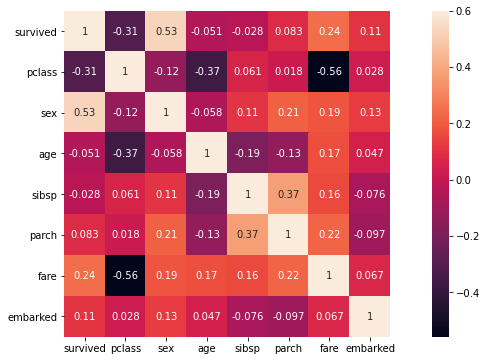

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(titanic_complete.corr(),vmax=0.6, square=True,annot=True)

In [23]:
#Dropping embarked feature
titanic_complete=titanic_complete.drop(['embarked'],1)

In [24]:
# Assign X (data) and y (target)
X = titanic_complete.drop('survived', axis = 1)
y = titanic_complete['survived']
print(X.shape, y.shape)

(1309, 6) (1309,)


### Split Data into Training and Testing

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
#feature Scaling

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [27]:
from sklearn.preprocessing import MinMaxScaler 
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## 1. Logistic Regression 


Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1.

In [59]:
#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [64]:
#Using scaled Dataset
from sklearn.linear_model import LogisticRegression

model_LogisticRegression  = LogisticRegression()
model_LogisticRegression .fit(X_train_scaled, y_train)
y_pred = model_LogisticRegression .predict(X_test_scaled)

train_log = round(model_LogisticRegression.score(X_train_scaled, y_train) * 100, 2)
test_log = round(model_LogisticRegression.score(X_test_scaled, y_test) * 100, 2)

print(f"Training Data Score: {round(model_LogisticRegression.score(X_train_scaled, y_train) * 100, 2)} %")
print(f"Testing Data Score: {round(model_LogisticRegression.score(X_test_scaled, y_test) * 100, 2)} %")



Training Data Score: 77.47 %
Testing Data Score: 81.4 %


In [30]:
predictions = model_LogisticRegression.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 1 0 1 0 0 1 1 0]
First 10 Actual labels: [0, 0, 1, 0, 1, 0, 0, 1, 1, 0]


In [31]:
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [32]:
# Creating Confusion Matrix
list = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
list.append(ac)
print (cm)
print (ac)

[[172  23]
 [ 38  95]]
0.8140243902439024


In [33]:
titanic_complete.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,1,1,1,29.0000,0,0,211.3375
1,1,1,0,0.9167,1,2,151.5500
2,0,1,1,2.0000,1,2,151.5500
3,0,1,0,30.0000,1,2,151.5500
4,0,1,1,25.0000,1,2,151.5500


#### Testing with new data set

In [37]:
#pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
new_titanic_data =[[1,0,30.0000,1,2,151.5500]]
new_titanic_data_2 =[[1,0,2.0000,1,2,151.5500]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

new_scaled_data =sc.fit_transform(new_titanic_data)
predicted_class = model_LogisticRegression.predict(new_scaled_data)
print(predicted_class)

[1]


## 2. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

train_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)

print(f"Training Data Score: {round(decision_tree.score(X_train, y_train) * 100, 2)} %")
print(f"Testing Data Score: {round(decision_tree.score(X_test, y_test) * 100, 2)} %")

Training Data Score: 97.04 %
Testing Data Score: 75.91 %


In [40]:
#Testing with new data

new_titanic_data =[[1,0,30.0000,1,2,151.5500]]
predicted_class = decision_tree.predict(new_titanic_data)
print(predicted_class)

[0]


## 3. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

train_random_forest = round(rf.score(X_train, y_train) * 100, 2)
test_random_forest = round(rf.score(X_test, y_test) * 100, 2)

print(f"Training Data Score: {round(rf.score(X_train, y_train) * 100, 2)} %")
print(f"Testing Data Score: {round(rf.score(X_test, y_test) * 100, 2)} %")

Training Data Score: 97.04 %
Testing Data Score: 77.44 %


## 4. K Nearest Neighbor

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

train_knn = round(knn.score(X_train, y_train) * 100, 2)
test_knn = round(knn.score(X_test, y_test) * 100, 2)

print(f"Training Data Score: {round(knn.score(X_train, y_train) * 100, 2)} %")
print(f"Testing Data Score: {round(knn.score(X_test, y_test) * 100, 2)} %")


Training Data Score: 82.87 %
Testing Data Score: 64.63 %


## 5. Support Vector Machine

In [43]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)


train_svc = round(svm.score(X_train, y_train) * 100, 2)
test_svc = round(svm.score(X_test, y_test) * 100, 2)

print(f"Training Data Score: {round(svm.score(X_train, y_train) * 100, 2)} %")
print(f"Testing Data Score: {round(svm.score(X_test, y_test) * 100, 2)} %")


Training Data Score: 69.42 %
Testing Data Score: 63.11 %


## 6. Linear SVM

In [49]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)


train_linear_svm = round(linear_svm.score(X_train, y_train) * 100, 2)
test_linear_svm = round(linear_svm.score(X_test, y_test) * 100, 2)

print(f"Training Data Score: {round(linear_svm.score(X_train, y_train) * 100, 2)} %")
print(f"Testing Data Score: {round(linear_svm.score(X_test, y_test) * 100, 2)} %")

Training Data Score: 75.54 %
Testing Data Score: 72.26 %


C:\Users\rchauhan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### ***********Grid Search TO DO

# Model Evaluation

In [52]:
models = pd.DataFrame({'Model':['Logistic Regression','Decison Tree','Random Forest','KNN','SVM','Linear SVM'],
                       'Training_Score':[train_log,train_decision_tree ,train_random_forest,train_knn,train_svc,train_linear_svm],
                       'Testing_Score':[test_log,test_decision_tree ,test_random_forest,test_knn,test_svc,test_linear_svm]
                      })
models.sort_values(by='Testing_Score',ascending = False)

,Model,Training_Score,Testing_Score
0,Logistic Regression,77.47,81.40
2,Random Forest,97.04,77.44
1,Decison Tree,97.04,75.91
5,Linear SVM,75.54,72.26
3,KNN,82.87,64.63
4,SVM,69.42,63.11


# Confusion Matrix - Logistic Regression

Accuracy: 81 % 

Confusion Matrix in Numbers
[[172  23]
 [ 38  95]]

Confusion Matrix in Percentage
[[0.88 0.12]
 [0.29 0.71]]



<AxesSubplot:>

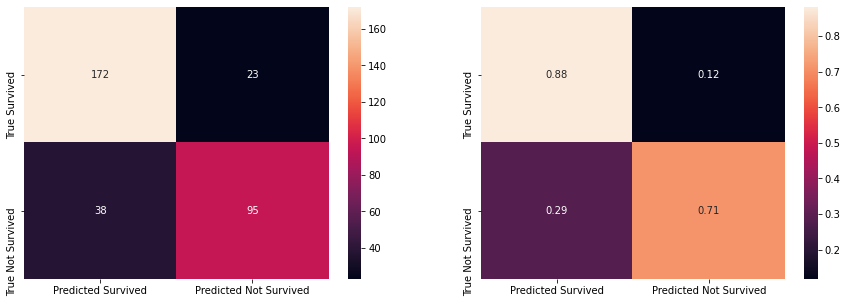

In [68]:
from sklearn.metrics import confusion_matrix
import itertools

model_LogisticRegression  = LogisticRegression()
model_LogisticRegression .fit(X_train_scaled, y_train)
y_pred = model_LogisticRegression .predict(X_test_scaled)

acc = round(model_LogisticRegression.score(X_test_scaled, y_test) * 100, 2)
print ("Accuracy: %i %% \n"%acc)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

## Exporting Model

In [45]:
import pickle

list_pickle_path = 'LogisticRegression_Model.pkl'
list_pickle = open(list_pickle_path, 'wb')

pickle.dump(model_LogisticRegression, list_pickle)
list_pickle.close()

In [46]:
import pickle

list_pickle_path = 'SVM_Model.pkl'
list_pickle = open(list_pickle_path, 'wb')

pickle.dump(svm, list_pickle)
list_pickle.close()